# OLS

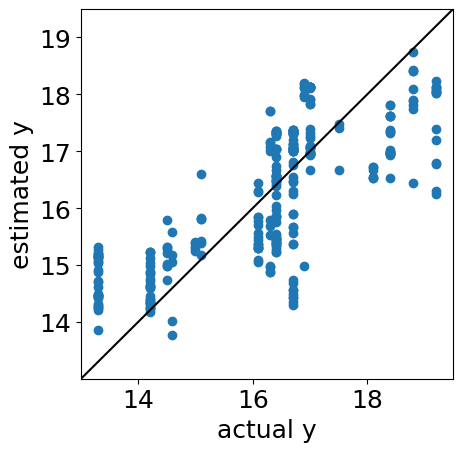

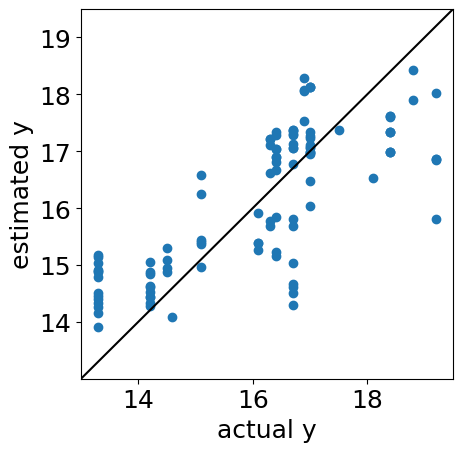

R2 : 訓練 0.5869192197272584, 検証 0.5822720691430379
MAE : 訓練 0.8430677825900842, 検証 0.869983162056581
RMSE) : 訓練 1.024393609496139, 検証 1.0760350340735418


,標準回帰係数
Al2O3/SiO2,-0.062769
H2O/SiO2,0.023585
NaOH/SiO2,0.098389
KOH/SiO2,-0.046809
CsOH/SiO2,0.013358
temperature,0.784137
time,0.163039


In [3]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# OLSの実行
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_ols = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_ols)
                      
標準回帰係数_ols.to_csv('標準回帰係数_ols_collected.csv')

# PLS

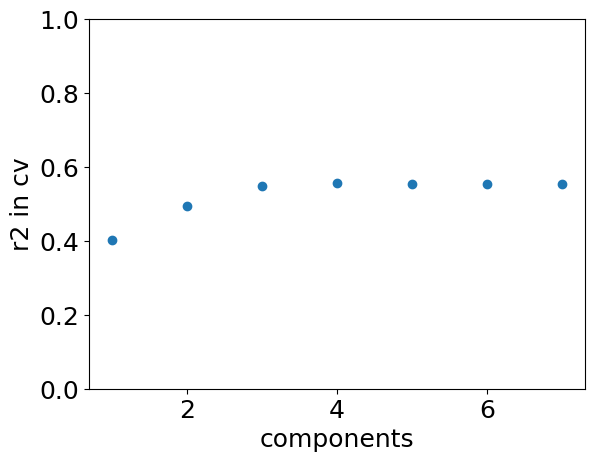

最適な成分数 : 4


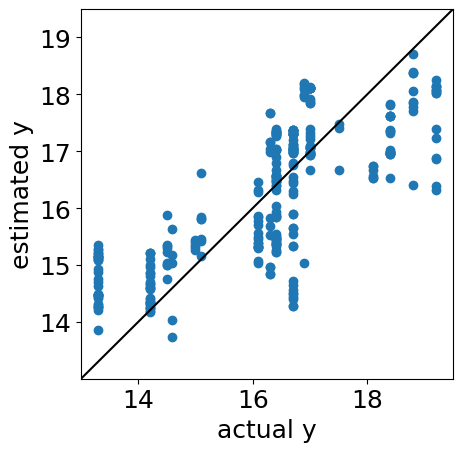

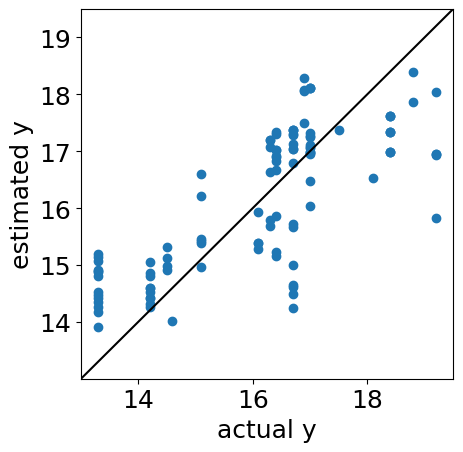

R2 : 訓練 0.5867305228468271, 検証 0.5833500367317186
MAE : 訓練 0.8425279430510259, 検証 0.8703331632650774
RMSE) : 訓練 1.0246275562417702, 検証 1.0746457564036396


,標準回帰係数
Al2O3/SiO2,-0.074677
H2O/SiO2,0.044025
NaOH/SiO2,0.089507
KOH/SiO2,-0.056323
CsOH/SiO2,0.016199
temperature,0.780150
time,0.167657


In [4]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# PLSの実行
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import numpy as np

max_number_of_components=x.columns.shape[0]
components=np.arange(1, max_number_of_components+1)
all_components=[]
r2_in_cv_all=[]

for component in components:
    model=PLSRegression(n_components=component)
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5)
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    all_components.append(component)
    r2_in_cv_all.append(r2_in_cv)

import matplotlib.pyplot as plt
plt.scatter(all_components, r2_in_cv_all)
plt.xlabel('components')
plt.ylabel('r2 in cv')
plt.ylim(0, 1)
plt.show()

optimal_component=all_components[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適な成分数 : {optimal_component}")
model=PLSRegression(n_components=optimal_component)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_pls = pd.DataFrame(model.coef_.T, index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_pls)

標準回帰係数_pls.to_csv('標準回帰係数_pls_colected.csv')

# DT

最適な深さ: 44
最適な最小サンプル数: 5


,importance
Al2O3/SiO2,0.024855
H2O/SiO2,0.096848
NaOH/SiO2,0.085505
KOH/SiO2,0.104937
CsOH/SiO2,0.000000
temperature,0.622235
time,0.065620


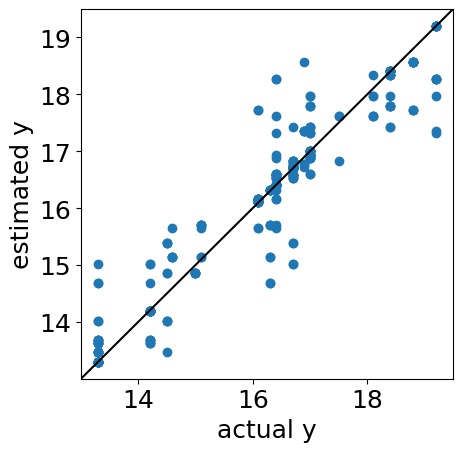

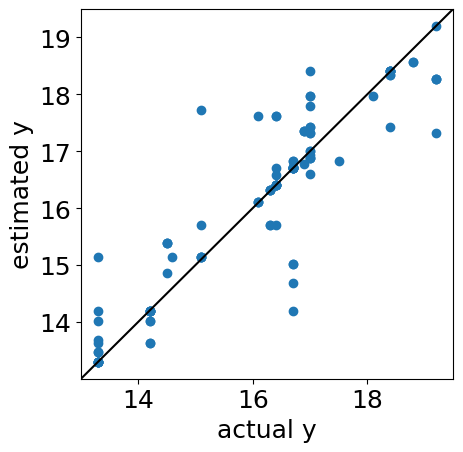

R2 : 訓練 0.8952271498498204, 検証 0.8281929780206205
MAE : 訓練 0.2904365079365083, 検証 0.3904925731760596
RMSE) : 訓練 0.5159097616135596, 検証 0.6900810619967236


In [5]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

#DTの実行
from sklearn.tree import DecisionTreeRegressor
import numpy as np
max_depths=np.arange(1, 51, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeRegressor()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=5)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeRegressor(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_DT_collected.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RF

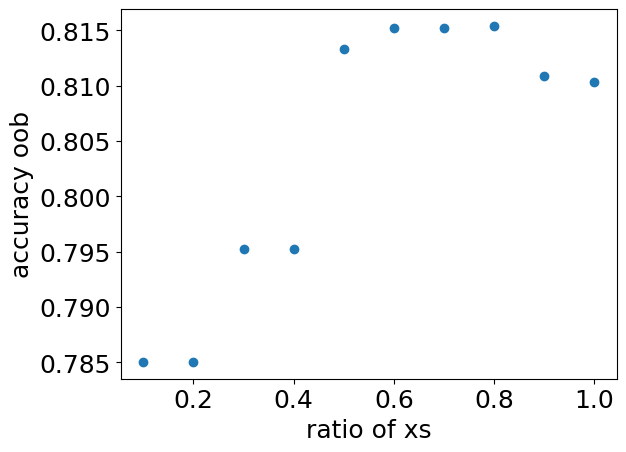

最適なx: 0.8


,importance
Al2O3/SiO2,0.101874
H2O/SiO2,0.083154
NaOH/SiO2,0.118236
KOH/SiO2,0.072426
CsOH/SiO2,0.009348
temperature,0.541230
time,0.073732


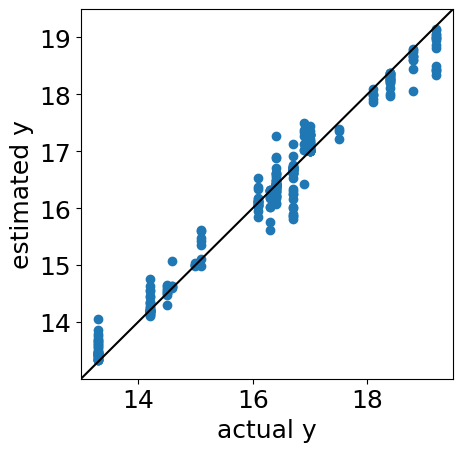

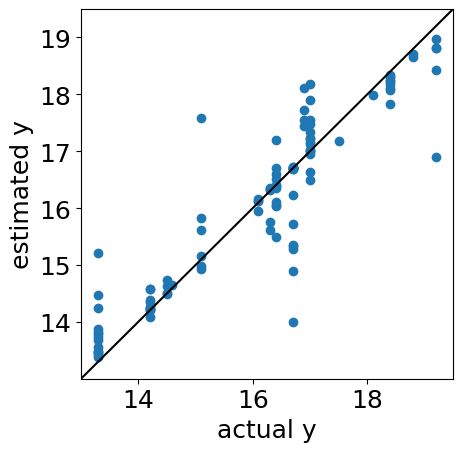

R2 : 訓練 0.9749458133606016, 検証 0.8404122425916001
MAE : 訓練 0.1597191358024937, 検証 0.40026605504588453
RMSE) : 訓練 0.25228389089465153, 検証 0.6650885023538721


In [6]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# RFの実行
from sklearn.ensemble import RandomForestRegressor
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
r2_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestRegressor(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=99)
    model_oob.fit(x_train, y_train)
    r2_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, r2_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[r2_oob.index(max(r2_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestRegressor(n_estimators=500, max_features=optimal_x, oob_score=True, random_state=99)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_RF_collected.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# k-NN

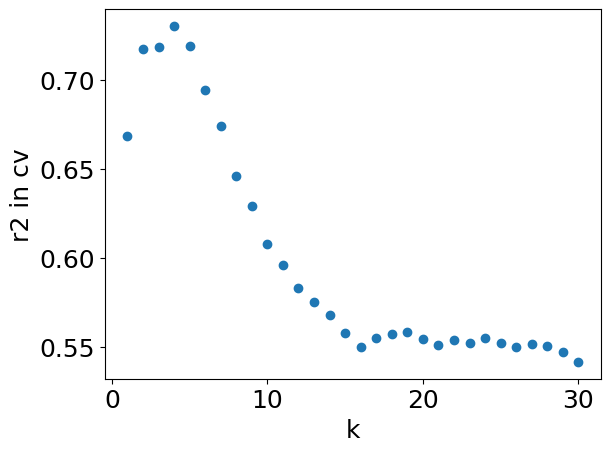

最適なk: 4


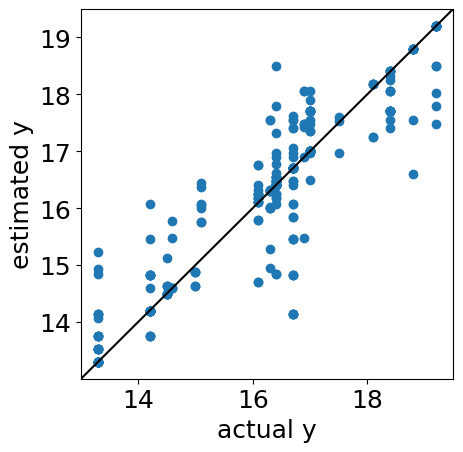

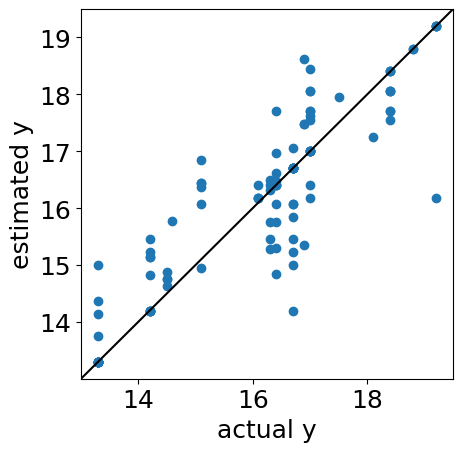

R2 : 訓練 0.8342451912966813, 検証 0.7719192850262787
MAE : 訓練 0.3646604938271603, 検証 0.5133027522935779
RMSE) : 訓練 0.6489069632185958, 検証 0.7951039975830061


In [7]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# k-NNの実行
from sklearn.neighbors import KNeighborsRegressor
ks=np.arange(1, 31, 1)
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
all_ks=[]
r2_in_cv_all=[]
for k in ks:
    model_for_cross_validation=KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model_for_cross_validation, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_ks.append(k)
import matplotlib.pyplot as plt
plt.scatter(all_ks, r2_in_cv_all)
plt.xlabel('k')
plt.ylabel('r2 in cv')
plt.show()

optimal_k=all_ks[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なk: {optimal_k}")

model=KNeighborsRegressor(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# XGB

,importance
Al2O3/SiO2,0.016201
H2O/SiO2,0.049186
NaOH/SiO2,0.064265
KOH/SiO2,0.165826
CsOH/SiO2,0.015966
temperature,0.636242
time,0.052315


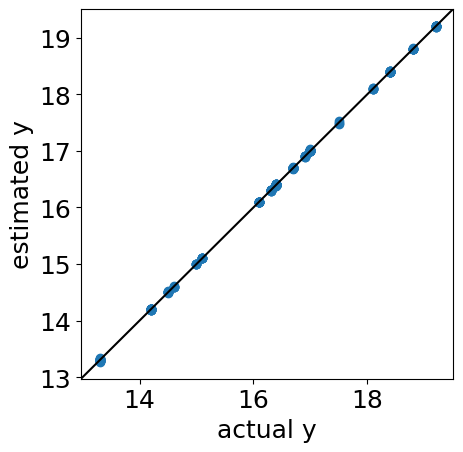

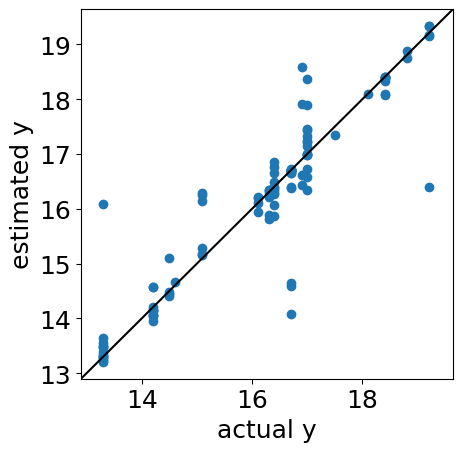

R2 : 訓練 0.9999835415481817, 検証 0.847668397928308
MAE : 訓練 0.00395639266496815, 検証 0.31958185773377
RMSE) : 訓練 0.006466121433731376, 検証 0.6497924470037749


In [8]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# XGBの実行
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_xgb_collected.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# LGBM

,importance
Al2O3/SiO2,159.041914
H2O/SiO2,232.555094
NaOH/SiO2,464.350035
KOH/SiO2,397.856474
CsOH/SiO2,0.000000
temperature,2538.687076
time,267.615421


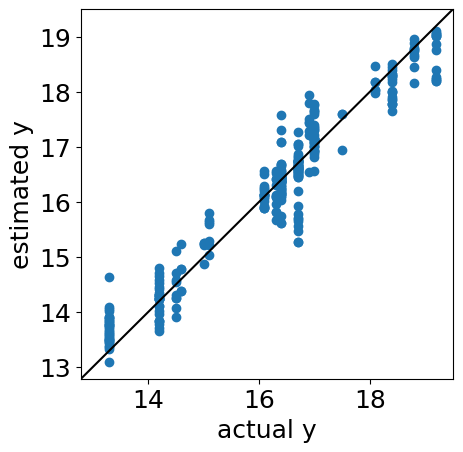

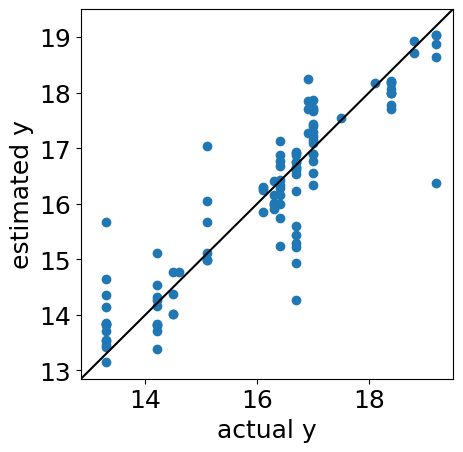

R2 : 訓練 0.9372318714534453, 検証 0.8155543289031915
MAE : 訓練 0.285079157239747, 検証 0.49162346538208335
RMSE) : 訓練 0.3993180634641646, 検証 0.7150129169910755


In [9]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# LGBMの実行
import lightgbm as lgbm
model=lgbm.LGBMRegressor(importance_type = "gain")
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_lgbm_collected.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# SVM (nonlinear)

最適なC: 64.0
最適なgamma: 0.25
最適なepsilon: 0.25


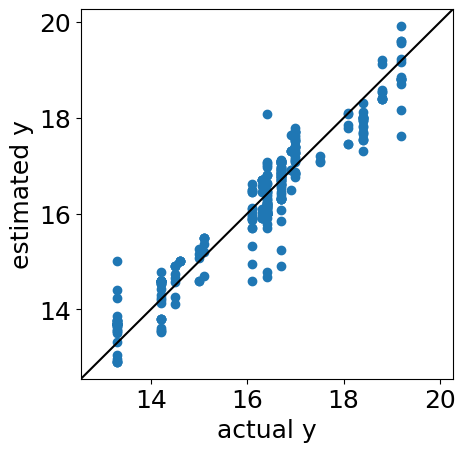

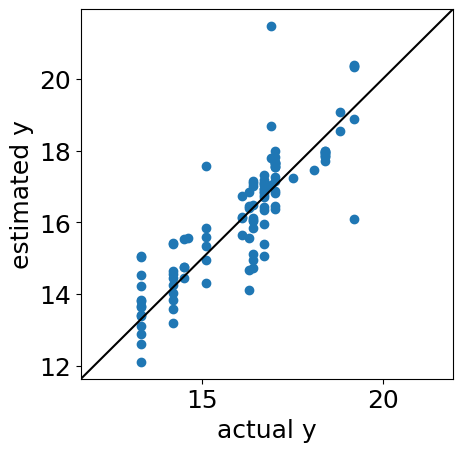

R2 : 訓練 0.9115619602300256, 検証 0.6801316441444264
MAE : 訓練 0.38147447402309703, 検証 0.6740633856047618
RMSE : 訓練 0.47398971719149297, 検証 0.9415974921907029


In [10]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# SVM(nonlinear)の実行
from sklearn.svm import SVR
import numpy as np
nonlinear_svr_cs=2**np.arange(-5, 11, 1.0)
nonlinear_svr_gammas=2**np.arange(-10, 1, 1.0)
nonlinear_svr_epsilons=2**np.arange(-20, 11, 1.0)
# gammaの最適化
from scipy.spatial.distance import cdist
square_of_euclidean_distance = cdist(autoscaled_x_train, autoscaled_x_train, metric='sqeuclidean')
variance_of_gram_matrix = []
for nonlinear_svr_gamma in nonlinear_svr_gammas:
    gram_matrix = np.exp(- nonlinear_svr_gamma * square_of_euclidean_distance)
    variance_of_gram_matrix.append(gram_matrix.var(ddof=1))
optimal_nonlinear_svr_gamma = nonlinear_svr_gammas[variance_of_gram_matrix.index(max(variance_of_gram_matrix))]
# クロスバリデーションの設定
from sklearn.model_selection import KFold
fold = KFold(n_splits=5, shuffle=True, random_state=9)
from sklearn.model_selection import GridSearchCV
# epsilonの最適化
model_for_cross_validation=SVR(kernel='rbf', C=3, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'epsilon':nonlinear_svr_epsilons}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_epsilon=gs_cv.best_params_['epsilon']
# Cの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'C':nonlinear_svr_cs}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_c=gs_cv.best_params_['C']
# gammaの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, C=optimal_nonlinear_svr_c)
gs_cv=GridSearchCV(model_for_cross_validation, {'gamma':nonlinear_svr_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_gamma=gs_cv.best_params_['gamma']

print(f"最適なC: {optimal_nonlinear_svr_c}")
print(f"最適なgamma: {optimal_nonlinear_svr_gamma}")
print(f"最適なepsilon: {optimal_nonlinear_svr_epsilon}")

model=SVR(kernel='rbf',C=optimal_nonlinear_svr_c, gamma=optimal_nonlinear_svr_gamma, epsilon=optimal_nonlinear_svr_epsilon)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RR

最適なlambda: 4.0


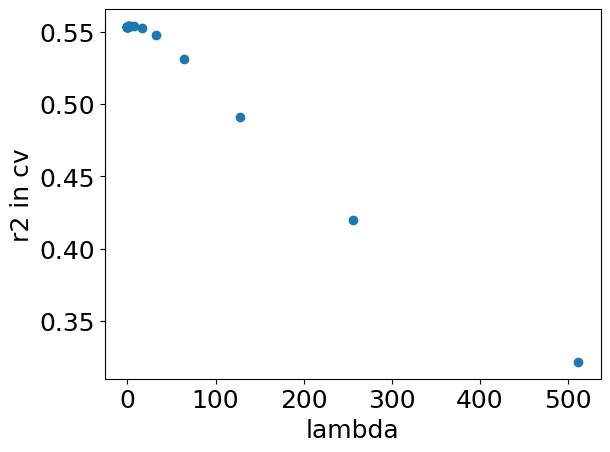

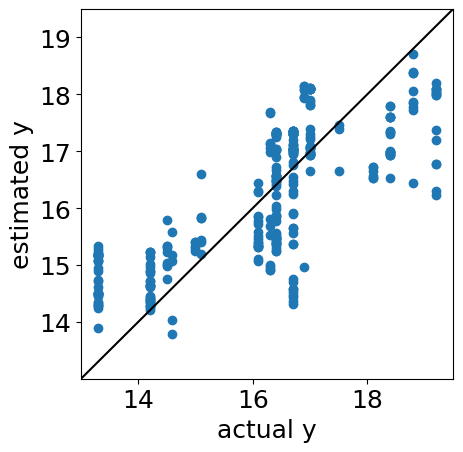

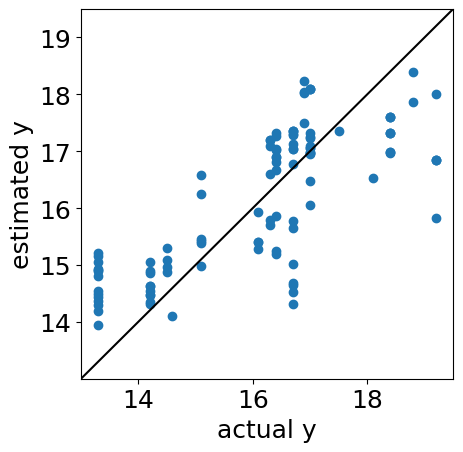

R2 : 訓練 0.5867802998711891, 検証 0.581184032919541
MAE : 訓練 0.84356944559621, 検証 0.8720517279565455
RMSE) : 訓練 1.0245658477809152, 検証 1.0774354715837962


,標準回帰係数
Al2O3/SiO2,-0.063823
H2O/SiO2,0.023999
NaOH/SiO2,0.091882
KOH/SiO2,-0.046824
CsOH/SiO2,0.010606
temperature,0.770949
time,0.159904


In [11]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

## RRの実行
from sklearn.linear_model import Ridge
import numpy as np
ridge_lambdas=2**np.arange(-15, 10, 1.0)
from sklearn.model_selection import cross_val_predict
r2_in_cv_all=[]
all_lambdas=[]
from sklearn import metrics
for ridge_lambda in ridge_lambdas:
    model=Ridge(alpha=ridge_lambda)
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_lambdas.append(ridge_lambda)

optimal_ridge_lambda=ridge_lambdas[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なlambda: {optimal_ridge_lambda}")

import matplotlib.pyplot as plt
plt.scatter(all_lambdas, r2_in_cv_all)
plt.xlabel('lambda')
plt.ylabel('r2 in cv')
plt.show()

model=Ridge(alpha=optimal_ridge_lambda)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_rr = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_rr)
                      
標準回帰係数_rr.to_csv('標準回帰係数_rr_collected.csv')

# LASSO

最適なlambda: 0.03125


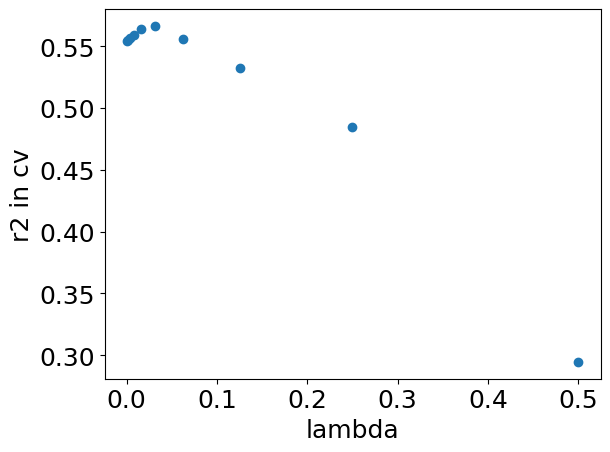

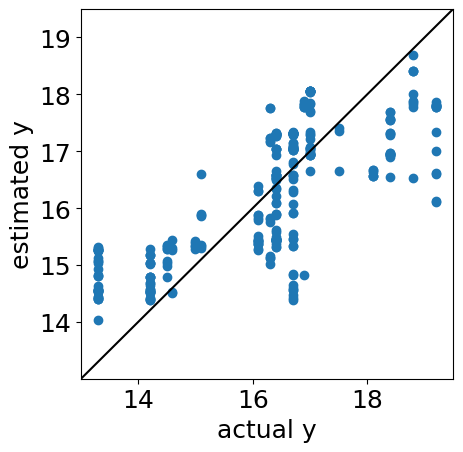

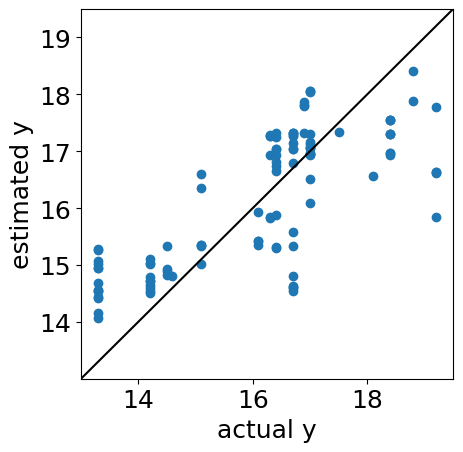

R2 : 訓練 0.5798295915320943, 検証 0.5628248368394881
MAE : 訓練 0.8503148519883288, 検証 0.8872957004971682
RMSE) : 訓練 1.0331469492853371, 検証 1.1007973985072848


,標準回帰係数
Al2O3/SiO2,-0.012337
H2O/SiO2,-0.000000
NaOH/SiO2,0.041091
KOH/SiO2,-0.030035
CsOH/SiO2,0.000000
temperature,0.734655
time,0.111188


In [12]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# LASSOの実行
from sklearn.linear_model import Lasso
import numpy as np
lasso_lambdas=2**np.arange(-10, 0, 1.0)
from sklearn.model_selection import cross_val_predict
r2_in_cv_all=[]
all_lambdas=[]
from sklearn import metrics
for lasso_lambda in lasso_lambdas:
    model=Lasso(alpha=lasso_lambda, max_iter=10000 )
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_lambdas.append(lasso_lambda)

optimal_lasso_lambda=lasso_lambdas[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なlambda: {optimal_lasso_lambda}")

import matplotlib.pyplot as plt
plt.scatter(all_lambdas, r2_in_cv_all)
plt.xlabel('lambda')
plt.ylabel('r2 in cv')
plt.show()

model=Lasso(alpha=optimal_lasso_lambda, max_iter=10000)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_lasso = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_lasso)
                      
標準回帰係数_lasso.to_csv('標準回帰係数_lasso_collected.csv')

# EN

最適なalpha: 0.03125
最適なl1ratio: 0.9600000000000001


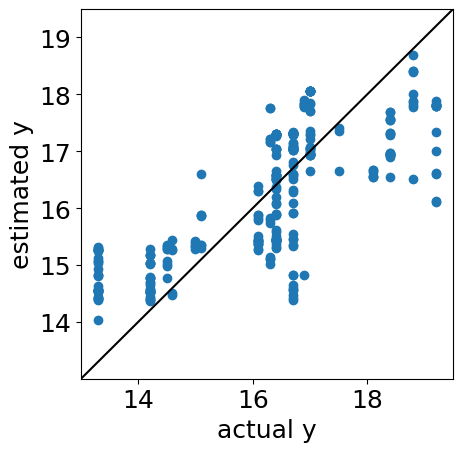

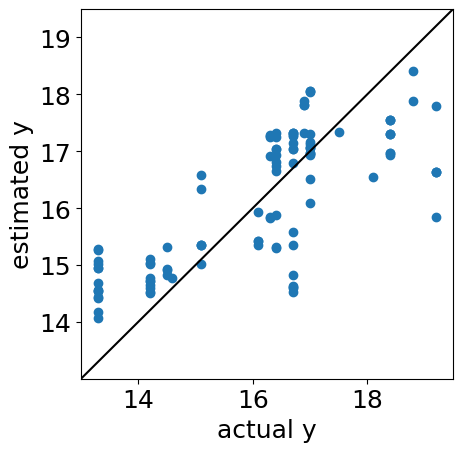

R2 : 訓練 0.5802550714498047, 検証 0.5636382257711583
MAE : 訓練 0.8498454216593405, 検証 0.8863958172491714
RMSE) : 訓練 1.0326237156032294, 検証 1.0997728740627897


,標準回帰係数
Al2O3/SiO2,-0.014615
H2O/SiO2,-0.000000
NaOH/SiO2,0.043309
KOH/SiO2,-0.029876
CsOH/SiO2,0.000000
temperature,0.735340
time,0.113071


In [13]:
# 前処理
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# ENの実行
import numpy as np
EN_lambdas=2**np.arange(-5, 2, dtype=float)
EN_alphas=np.arange(0.01, 1.00, 0.05, dtype=float)
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=ElasticNet(max_iter=10000)
gs_cv=GridSearchCV(model_for_cross_validation, {'alpha':EN_lambdas, 'l1_ratio':EN_alphas}, cv=5)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_lambda=gs_cv.best_params_['alpha']
optimal_alpha=gs_cv.best_params_['l1_ratio']

print(f"最適なalpha: {optimal_lambda}")
print(f"最適なl1ratio: {optimal_alpha}")

model=ElasticNet(alpha=optimal_lambda, l1_ratio=optimal_alpha, max_iter=10000)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_EN = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_EN)
                      
標準回帰係数_EN.to_csv('標準回帰係数_EN_collected.csv')

In [4]:
import pandas as pd
dataset=pd.read_csv('zeolite_433_FD.csv', index_col=0)
x=pd.concat([dataset.iloc[:, 0:8], dataset.iloc[:, 9]], axis=1)
x.corr()

,Al2O3/SiO2,H2O/SiO2,NaOH/SiO2,KOH/SiO2,CsOH/SiO2,MOH/SiO2,temperature,time,FD
Al2O3/SiO2,1.000000,0.633236,0.248661,0.642367,-0.064956,0.627103,-0.289563,0.223000,-0.249414
H2O/SiO2,0.633236,1.000000,0.334795,0.716556,-0.101389,0.749021,-0.155648,0.134996,-0.098767
NaOH/SiO2,0.248661,0.334795,1.000000,-0.143077,-0.050217,0.772280,-0.394615,-0.037535,-0.193512
KOH/SiO2,0.642367,0.716556,-0.143077,1.000000,-0.043277,0.518234,-0.018585,0.203016,-0.074010
CsOH/SiO2,-0.064956,-0.101389,-0.050217,-0.043277,1.000000,-0.066428,-0.194345,0.077601,-0.139446
MOH/SiO2,0.627103,0.749021,0.772280,0.518234,-0.066428,1.000000,-0.353962,0.098284,-0.215458
temperature,-0.289563,-0.155648,-0.394615,-0.018585,-0.194345,-0.353962,1.000000,-0.111106,0.743063
time,0.223000,0.134996,-0.037535,0.203016,0.077601,0.098284,-0.111106,1.000000,0.030521
FD,-0.249414,-0.098767,-0.193512,-0.074010,-0.139446,-0.215458,0.743063,0.030521,1.000000
